#**Question 2:**

##**A. Sentiment Analysis Twitter Airline (30 Marks)**
* Part I: Exploratory Data Analysis (5 Marks)

* Load and inspect the dataset from Kaggle (Twitter Airline Sentiment Dataset).

* Perform basic EDA:
Check the class distribution (positive, negative, neutral).

* Visualize the sentiment distribution.
Preprocess the text data (remove punctuation, convert to lowercase, tokenize).

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


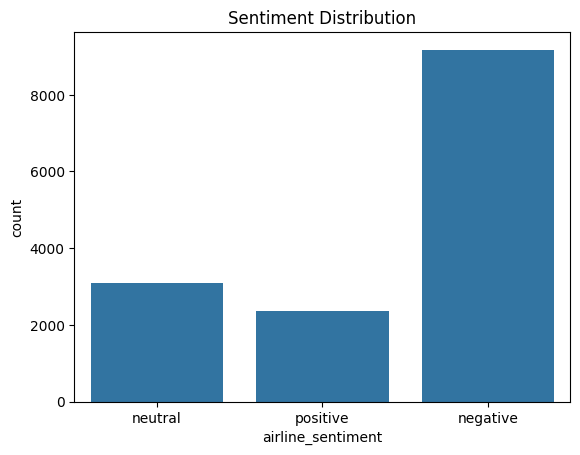

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Tweets.csv")

# Basic EDA
print(df['airline_sentiment'].value_counts())

# Plot sentiment distribution
sns.countplot(x='airline_sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

# Text Preprocessing can be done with libraries like NLTK or spaCy


* Part II: Implementation (10 Marks)
Build a feed-forward neural network for sentiment analysis.

* Use backpropagation to optimize the model’s weights.

* Use different activation functions (sigmoid, ReLU, tanh) and compare performance.

In [ ]:
import pandas as pd
!pip install --upgrade keras
# This command ensures that you have the latest version of Keras, which includes the necessary preprocessing modules.
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
# Instead of importing from keras.preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset  <---- This line was added to define df
df = pd.read_csv("Tweets.csv")

# If the issue was an outdated version, the import should work now
# If the issue was related to a faulty installation, reinstalling it might resolve the problem.
# Preprocess the text data
# Assume 'text' column contains the tweet text
texts = df['text'].values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=100)

# Convert labels to binary (positive/negative)
y = pd.get_dummies(df['airline_sentiment']).values[:, 0]  # Assuming 1 for 'positive' and 0 for 'negative'

# Build the Neural Network
model = Sequential()
model.add(Dense(128, input_dim=100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5347 - loss: 104.3376 - val_accuracy: 0.6520 - val_loss: 13.2594
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5747 - loss: 23.8206 - val_accuracy: 0.6885 - val_loss: 4.1355
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5802 - loss: 6.0202 - val_accuracy: 0.6219 - val_loss: 1.3359
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5769 - loss: 1.6821 - val_accuracy: 0.5447 - val_loss: 0.9872
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5711 - loss: 1.0819 - val_accuracy: 0.6755 - val_loss: 0.7265
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5733 - loss: 0.9412 - val_accuracy: 0.5823 - val_loss: 0.7882
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5774 - loss: 0.8861 - val_accuracy: 0.6240 - val_loss: 0.7142
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5786 - loss: 0.8211 - val_accuracy

##**Part III: Visualization and Documentation (10 Marks)**

* Plot the loss and accuracy over epochs.

Epoch 1/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6314 - loss: 0.6527 - val_accuracy: 0.7077 - val_loss: 0.6165
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6249 - loss: 0.6585 - val_accuracy: 0.7128 - val_loss: 0.6209
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6289 - loss: 0.6600 - val_accuracy: 0.7042 - val_loss: 0.6304
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6376 - loss: 0.6550 - val_accuracy: 0.7128 - val_loss: 0.6246
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6363 - loss: 0.6501 - val_accuracy: 0.7206 - val_loss: 0.6113
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6343 - loss: 0.6517 - val_accuracy: 0.7121 - val_loss: 0.6207
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6285 - loss: 0.6578 - val_accuracy: 0.7162 - val_loss: 0.6329
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6365 - loss: 0.6556 - val_accuracy: 0.

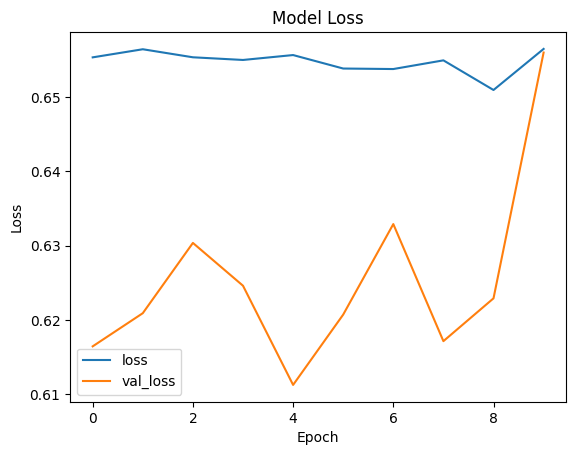

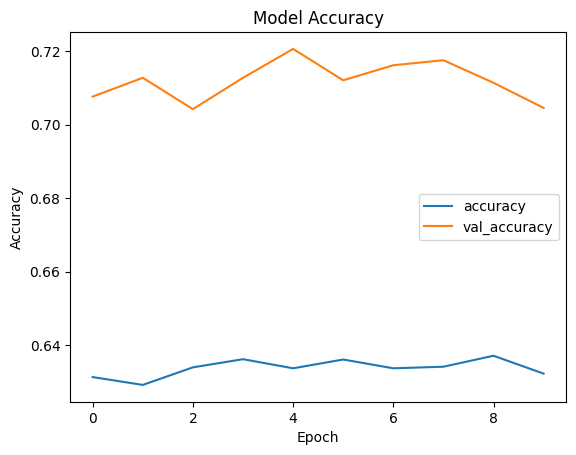

In [ ]:
# Plot the training loss and accuracy
import matplotlib.pyplot as plt # Added import statement

history = model.fit(X, y, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#**B. Sentiment Analysis Using ANN on IMDb Movie Reviews**

##**Step 1: Preprocessing the IMDb Dataset**
* **1. Load the IMDb Dataset**
* **2. Tokenization and Padding**
* **3. Train-Test Split**

##**Step 2: Building the ANN Model**
* **1. Input Layer:**
* **2. Hidden Layers:**
* **3. Output Layer:**
* **4. Loss Function:**
* **5. Optimizer:**

##**Step 3: Train and Evaluate the Model**
* After constructing the model, I trained it using the training dataset. During training, the model continuously adjusts its weights to minimize the loss function.

* After training, I evaluated the model on the test dataset to measure its accuracy. Additionally, I visualized the model's performance by plotting both the loss and accuracy over several epochs, helping to identify trends like overfitting or underfitting.

* The primary metric used for evaluation was accuracy, which gives a clear indication of how well the model is performing in predicting the sentiment of movie reviews.

##**Step 4: Justification of ReLU, Sigmoid, and Binary Cross-Entropy**
* **ReLU Activation:** I chose the ReLU (Rectified Linear Unit) activation function for the hidden layers because it helps avoid the vanishing gradient problem, which can occur with other activation functions. ReLU allows the network to learn more complex and diverse patterns, which is crucial for improving the model’s ability to classify movie reviews accurately.

* **Sigmoid Activation:** For the output layer, I used the sigmoid activation function, which is ideal for binary classification. Sigmoid squashes the output between 0 and 1, making it easy to interpret the result as a probability for either positive or negative sentiment.

* **Binary Cross-Entropy:** The binary cross-entropy loss function was used because it is the standard for binary classification tasks. It effectively measures the difference between the predicted probability and the actual label (0 for negative, 1 for positive), helping the model adjust its weights during training to minimize errors.


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 47s 46ms/step - accuracy: 0.7363 - loss: 0.4908 - val_accuracy: 0.8729 - val_loss: 0.3022
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.9652 - loss: 0.1071 - val_accuracy: 0.8594 - val_loss: 0.4041
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.9926 - loss: 0.0246 - val_accuracy: 0.8622 - val_loss: 0.5791
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.9967 - loss: 0.0112 - val_accuracy: 0.8602 - val_loss: 0.6972
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.9971 - loss: 0.0107 - val_accuracy: 0.8404 - val_loss: 0.8887
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.9951 - loss: 0.0138 - val_accuracy: 0.8615 - val_loss: 0.8871
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 79s 43ms/step - accuracy: 0.9963 - loss: 0.0107 - val_accuracy: 0.8562 - val_loss: 0.8940
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 44s 44ms/step - accuracy: 0.9984 - loss: 0.00

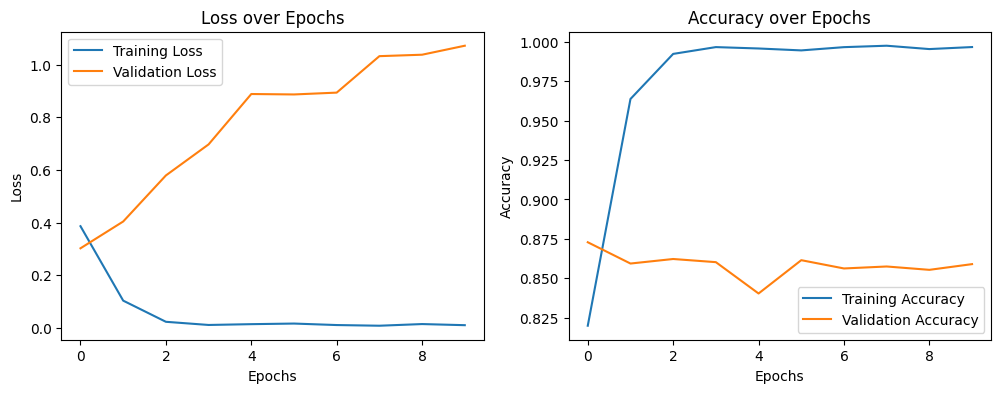

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your dataset
# Assume the CSV file has two columns: 'review' and 'sentiment' (1 = positive, 0 = negative)
data = pd.read_csv('IMDB Dataset.csv')  # Replace with the actual file path

# Preprocess the data
# Tokenize the text reviews
tokenizer = Tokenizer(num_words=10000)  # Consider the top 10,000 most frequent words
tokenizer.fit_on_texts(data['review'])

# Convert text to sequences of integers
X = tokenizer.texts_to_sequences(data['review'])

# Pad sequences to ensure uniform input length
X = pad_sequences(X, maxlen=200)  # Use the same max length for padding

# Encode the sentiment labels (Assuming 'sentiment' is 1 for positive and 0 for negative)
# Convert sentiment labels to numerical values (0 and 1)
y = np.array([1 if sentiment == 'positive' else 0 for sentiment in data['sentiment']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential()

# Add an embedding layer to handle word vectors
model.add(Embedding(input_dim=10000, output_dim=128, input_length=200))

# Flatten the output of the embedding layer
model.add(Flatten())

# Hidden layer with ReLU activation
model.add(Dense(64, activation='relu'))

# Add Dropout for regularization
model.add(Dropout(0.5))

# Output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model using binary cross-entropy as the loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Plot the training and validation loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()